In [11]:
import matplotlib.pyplot as plt
import numpy as np

def makeLU(A):
  U = np.copy(A)

  dim = list(np.shape(A))
  #print(dim)

  lista_fatores = []

  #print(f'\n0:\n {A}')

  for c in range(0, dim[0]-1):

    for l in range(c+1, dim[0]):
      pivo = U[c][c]
      fator = U[l][c]/pivo
      lista_fatores.append(fator)
      U[l][:] = U[l][:] - fator*U[c][:]
  
    #print(f'{c+1}:\n {U}')

  #print()
  #print(f'Fatores: {lista_fatores}')

  L = makeL(lista_fatores, dim[0])

  return U, L
#===============================================================================

def makeL(fatores, dimensao): 
  L = np.identity(dimensao)
  #print(f'Matriz L:\n{L}\n')

  dim = np.shape(L)

  aux = 0
  for i in range(1, dim[0]):
    for j in range(0, i):
      L[i][j] = fatores[aux]
      aux += 1

  #print(f'Matriz L:\n{L}\n')
  return L
#===============================================================================

def InvLU(U,L):
  dim = np.shape(L)
  print(dim)

  d = np.zeros((dim[0],dim[0]))

  y = np.zeros((dim[0]))

  for i in range(0, len(y)):
    for j in range(0, len(y)):
      y[0] = I[0][0]
      y[1] = I[1][0] - y[0] * L[1][0]
      y[2] = I[2][0] - y[0] * L[2][0] - y[1] * L[2][1]
  

  return d


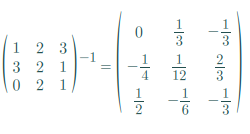

In [14]:
import numpy as np

A = np.array([
              [3., 2., 4.],
              [1., 1., 2.],
              [4., 3., -2.],
])
#print(A)


I = np.identity((3))
#print(I)

U , L = makeLU(A)

#print(U,"\n",L)

d = np.zeros((3,3))

y = np.zeros((3,1))

y[0] = I[0][0]
y[1] = I[1][0] - y[0] * L[1][0]
y[2] = I[2][0] - y[0] * L[2][0] - y[1] * L[2][1]
print("\nY:",y)

d[2][0] = y[2] / U[2][2]
d[1][0] = (y[1] - d[2][0] * U[1][2]) / U[1][1]
d[0][0] = (y[0] - d[2][0] * U[0][2] - d[1][0] * U[0][1]) / U[0][0]

print(d)

y[0] = I[0][1]
y[1] = I[1][1] - y[0] * L[1][0]
y[2] = I[2][1] - y[0] * L[2][0] - y[1] * L[2][1]

d[2][1] = y[2] / U[2][2]
d[1][1] = (y[1] - d[2][1] * U[1][2]) / U[1][1]
d[0][1] = (y[0] - d[2][1] * U[0][2] - d[1][1] * U[0][1]) / U[0][0]

#print(d)

y[0] = I[0][2]
y[1] = I[1][2] - y[0] * L[1][0]
y[2] = I[2][2] - y[0] * L[2][0] - y[1] * L[2][1]

d[2][2] = y[2] / U[2][2]
d[1][2] = (y[1] - d[2][2] * U[1][2]) / U[1][1]
d[0][2] = (y[0] - d[2][2] * U[0][2] - d[1][2] * U[0][1]) / U[0][0]

#print('\n',d)

#d2 = InvLU(U, L)
#print(d2)


Y: [[ 1.        ]
 [-0.33333333]
 [-1.        ]]
[[ 1.     0.     0.   ]
 [-1.25   0.     0.   ]
 [ 0.125  0.     0.   ]]


In [ ]:
A = np.array([
              [1., 2., 3.],
              [3., 2., 1.],
              [0., 2., 0.],
])
U, L = makeLU(A)
print(U)


0:
 [[1. 2. 3.]
 [3. 2. 1.]
 [0. 2. 0.]]
1:
 [[ 1.  2.  3.]
 [ 0. -4. -8.]
 [ 0.  2.  0.]]
2:
 [[ 1.  2.  3.]
 [ 0. -4. -8.]
 [ 0.  0. -4.]]

Fatores: [3.0, 0.0, -0.5]
Matriz L:
[[ 1.   0.   0. ]
 [ 3.   1.   0. ]
 [ 0.  -0.5  1. ]]

[[ 1.  2.  3.]
 [ 0. -4. -8.]
 [ 0.  0. -4.]]


#**Decomposição LU (Lower Upper)**

Um dos motivos para introduzir a decomposição LU é que ela fornece uma maneira eficiente de calcular a matriz inversa, a qual tem muitas aplicações na engenharia; ela também fornece um meio de avaliar o condicionamento do sistema.

A decomposição é dividido em dois passos:

1.   Decompomos a matriz $A$ em duas matrizes, uma triangular inferior $L$ com os elementos da diagonal principal iguais a 1. E a segunda uma matriz triangular superior $U$

2.   Depois iremos solucionar o sistema a partir da multiplicação dessas matrizes $L$x$U$

Sabendo que a matriz $A$ é :

$A = LU$

Então:

$Ax = b$

$LUx = b$

Podemos simplificar que $Ux$ é um vetor de incógnitas $y$:

$LUx = b$

$Ly = b$

Assim podemos resolver o sistema das incógnitas $y$. Após encontrar os valores de $y_n$, já que:

$Ly = b$

Podemos encontrar as incógnitas $x_n$ dos sistemas a partir da equação:

$Ly = b$

$LUx = b$

$Ux = y$


Para encontrar as matrizes $LU$ utilizaremos do método de Gauss.



In [ ]:
L = np.identity(3)


A = np.array([[3, 2, 4],
              [1, 1, 2],
              [4, 3, -2]], dtype='float16')

b = np.array([
  [1],
  [2],
  [3] 
])

No método Gauss, a matriz escalona $A$ será a nossa matriz $U$. Podemos notar que o resultado do escalonamento da matriz $A$ será uma matriz triangular superior.

In [ ]:
U, fatores = makeU(A)

[3, 3]

0:
 [[ 3.  2.  4.]
 [ 1.  1.  2.]
 [ 4.  3. -2.]]
1:
 [[ 3.      2.      4.    ]
 [ 0.      0.3335  0.667 ]
 [ 0.      0.334  -7.332 ]]
2:
 [[ 3.000e+00  2.000e+00  4.000e+00]
 [ 0.000e+00  3.335e-01  6.670e-01]
 [ 0.000e+00  2.441e-04 -8.000e+00]]

Fatores: [0.3333, 1.333, 1.001]


Para encontrarmos a matriz $L$ usaremos os fatores usados no escalonamento da matriz $A$.

A matriz $L$ terá sua diagonal principal prennchido por 1 e a parte inferior preenchido pelos fatores das respectivas linhas.

In [ ]:
dim = np.shape(U)
L = makeL(fatores, dim[0])

Matriz L:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matriz L:
[[1.         0.         0.        ]
 [0.33325195 1.         0.        ]
 [1.33300781 1.00097656 1.        ]]



Após Acharmos as matrizes $LU$ basta solucionarmos os sistemas:

$Ly = b$

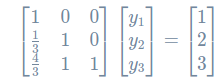



In [ ]:
y1 = 1/L[0][0]
y2 = b[1][0]-L[1][0]*y1
y3 = 3-L[2][0]*y1-L[2][1]*y2

y = np.array([
  [y1],
  [y2],
  [y3]
])

print(y)

[[ 1.00000000e+00]
 [ 1.66674805e+00]
 [-1.38354301e-03]]


Agora resolvemos a equação:

$Ux = y$

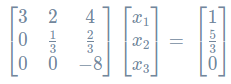

In [ ]:
x3 = y3/-8
x2 = (y2-2/3*x3)/(1/3)
x1 = ((y1-2*x2-4*x3)/3)

x = np.array([
  [x1],
  [x2],
  [x3]
])


print(x)

[[-3.00016276e+00]
 [ 4.99989825e+00]
 [ 1.72942877e-04]]


#**Exemplo Qualquer**

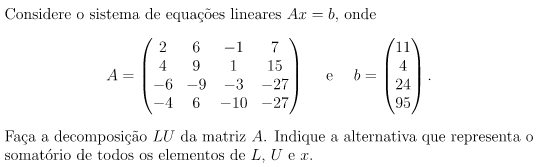

Primeiro criamos a matriz $A$ e $b$

In [ ]:
A = np.array([
              [1., -4., 1., 6.],
              [-1., 3., 1., -2.],
              [2., -1., -7., -10.],
              [6., -19., -34., -16.]
])

b = np.array([
              [4.],
              [2.],
              [-29.],
              [-16.]
])



Depois escalonamos a matriz $A$ para achar a matriz $U$ e os fatores utilizados.

In [ ]:
U, fatores = makeU(A)

[4, 4]

0:
 [[  1.  -4.   1.   6.]
 [ -1.   3.   1.  -2.]
 [  2.  -1.  -7. -10.]
 [  6. -19. -34. -16.]]
1:
 [[  1.  -4.   1.   6.]
 [  0.  -1.   2.   4.]
 [  0.   7.  -9. -22.]
 [  0.   5. -40. -52.]]
2:
 [[  1.  -4.   1.   6.]
 [  0.  -1.   2.   4.]
 [  0.   0.   5.   6.]
 [  0.   0. -30. -32.]]
3:
 [[ 1. -4.  1.  6.]
 [ 0. -1.  2.  4.]
 [ 0.  0.  5.  6.]
 [ 0.  0.  0.  4.]]

Fatores: [-1.0, 2.0, 6.0, -7.0, -5.0, -6.0]


Depois de achado os fatores, colocamos na matriz $L$ (que é uma matriz triangular inferior com elemento 1 na diagonal principal)

In [ ]:
dim = np.shape(U)
L = makeL(fatores, dim[0])


Matriz L:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Matriz L:
[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 2.  6.  1.  0.]
 [-7. -5. -6.  1.]]



Resolvendo primeiro a equação $Ly = b$
para encontrarmos os valores de $y_n$



In [ ]:
y1 = b[0][0]
y2 = b[1][0] + L[1][0]*y1
y3 = b[2][0] + L[2][0]*y1 + L[2][1]*y2
y4 = b[3][0] + L[3][0]*y1 + L[3][1]*y2 + L[3][2]*y3

y = np.array([
              [y1],
              [y2],
              [y3],
              [y4]
])

print(f"y=\n{y}\n")

y=
[[  4.]
 [ -2.]
 [-33.]
 [164.]]



Encontrado os valores de $y_n$, agora resolvemos $Ux = y$ para encontrarmos os valores de $x_n$

In [ ]:
x4 = y4/U[3][3]
x3 = (y3 + U[2][3]*x4)/U[2][2] 
x2 = (y2 + U[1][3]*x4 + U[1][2]*x3)/U[1][1]
x1 = (y1 + U[0][3]*x4 + U[0][2]*x3 + U[0][1]*x2)/U[0][0]

x = np.array([
              [x1],
              [x2],
              [x3],
              [x4]
])

print(f'x=\n{x}\n')

x=
[[1281.4]
 [-247.2]
 [  42.6]
 [  41. ]]



Agora como a questão pede o somatórios dos termos, utilizaremos a função *built-in* **.sum** para somar todos os termos do objeto.


In [ ]:
print(f'\nSoma dos elementos de L: {np.sum(L)}')
print(f'Soma dos elementos de U: {np.sum(U)}')
print(f'Soma dos elementos de x: {np.sum(x)}')


Soma dos elementos de L: -7.0
Soma dos elementos de U: 24.0
Soma dos elementos de x: 1117.8
